In [1]:
import numpy as np #import numpy drives sklearn to use numpy arrays instead of python lists
import pandas as pd #CSV and dataframe handling
import matplotlib.pyplot as plt

In [8]:
MEvents_2015 = pd.read_csv('Data_ML/MPlayByPlay_Stage2/Mevents2015.csv')
MTeams = pd.read_csv('Data_ML/MDataFiles_Stage1/Mteams.csv')

In [10]:
MEvents_2015.head()

,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
0,1,2015,11,1103,1420,74,57,0,0,19,1103,112,miss3,unk,0,0,0
1,2,2015,11,1103,1420,74,57,0,0,19,1420,13747,reb,def,0,0,0
2,3,2015,11,1103,1420,74,57,0,2,27,1420,13753,made2,dunk,0,0,0
3,4,2015,11,1103,1420,74,57,0,2,27,1420,13770,assist,NaN,0,0,0
4,5,2015,11,1103,1420,74,57,2,2,59,1103,98,made2,jump,0,0,0


In [11]:
MTeams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2020
1,1102,Air Force,1985,2020
2,1103,Akron,1985,2020
3,1104,Alabama,1985,2020
4,1105,Alabama A&M,2000,2020


In [5]:
max(MEvents_2015['ElapsedSeconds'])

3600

In [189]:
list_events = MEvents_2015.groupby(by = 'EventType').agg(sum)
type(list_events)

pandas.core.frame.DataFrame

In [190]:
df_stats = pd.DataFrame(columns = ['sub','reb','foul','miss3','miss2','made2','assist','turnover','made1','made3','timeout','steal','miss1','block','season','TeamID'])

In [191]:
i=0
for team in MTeams['TeamID']:
    df = MEvents_2015[MEvents_2015['EventTeamID']==team]
    df_sum = df['EventType'].value_counts()/len(MEvents_2015[MEvents_2015['EventTeamID']==team])*100
    liste = list(df_sum)
    if len(liste) == 14:
   
        liste.append(2015)
        liste.append(team)

        df_stats.loc[i] = liste
        i+=1
    

In [185]:
for team in [1103]:
    df = MEvents_2015[MEvents_2015['EventTeamID']==team]
    df_sum = df['EventType'].value_counts()/len(MEvents_2015[MEvents_2015['EventTeamID']==1103])
    liste = list(df_sum)
    liste.append(2015)
    liste.append(team)    

In [220]:
df_stats.drop(['TeamID'],axis = 1)

,sub,reb,foul,miss3,miss2,made2,assist,turnover,made1,made3,timeout,steal,miss1,block,season
0,30.124720,13.159578,9.322034,8.762392,6.347937,5.740326,5.340582,5.308602,4.876879,3.245923,2.766230,2.654301,1.822833,0.527662,2015.0
1,26.990168,14.779575,8.293689,7.564225,6.850618,6.470029,6.010149,5.391690,4.741516,3.346020,3.298446,2.901998,2.457977,0.903901,2015.0
2,28.840649,15.803912,7.776718,7.108779,6.357347,5.570134,5.033397,4.937977,4.723282,3.816794,3.244275,2.540553,2.433206,1.812977,2015.0
3,24.678698,15.983046,8.777687,7.150670,7.068635,6.453377,6.275636,5.345912,4.662291,3.390757,2.980585,2.816516,2.802844,1.613344,2015.0
4,18.245078,18.109301,9.351663,8.520027,7.094365,6.737950,6.704005,6.670061,5.719620,3.665988,2.732519,2.681602,2.647658,1.120163,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,30.295308,13.521211,8.499475,7.465148,7.165343,5.666317,5.351522,5.291560,4.901814,3.462749,2.743217,2.293509,2.248538,1.094289,2015.0
347,24.567214,16.001806,7.481560,6.969743,6.969743,6.503086,6.262231,6.171910,5.569773,3.657986,2.980581,2.739726,2.694566,1.430077,2015.0
348,28.858177,15.114621,7.919272,7.425688,6.833388,6.537238,6.208183,4.902929,4.738401,2.994406,2.566634,2.445980,2.292421,1.162663,2015.0
349,24.437155,16.892799,7.917102,7.753094,6.947965,6.590130,5.755181,5.650813,5.099150,3.101238,2.937230,2.698673,2.534665,1.684807,2015.0


In [223]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)
x = StandardScaler().fit_transform(df_stats)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

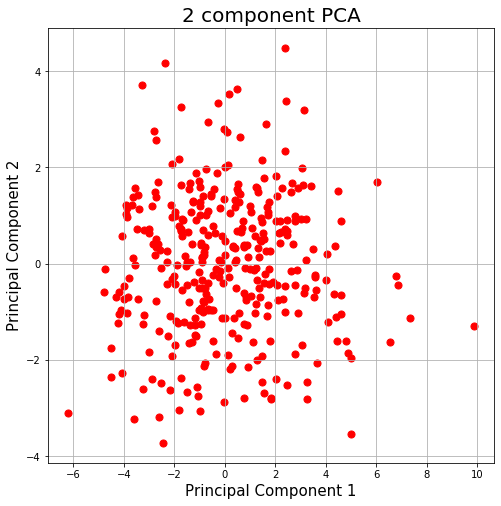

In [224]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
color = 'r'
finalDf = principalDf
ax.scatter(finalDf['principal component 1']
               , finalDf['principal component 2']
               , c = color
               , s = 50)

ax.grid()